<a href="https://colab.research.google.com/github/HarishSingh1981/LearningNeuralNetwork/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googleDriveFileDownloader
from googleDriveFileDownloader import googleDriveFileDownloader
a = googleDriveFileDownloader()
#model and dataloader modules
#https://drive.google.com/file/d/17yebFq7OEyCkQL7-eFdi9BJwyabmQ49t/view?usp=share_link
#https://drive.google.com/file/d/18HB4i0cfZDCxLYUlO1DJu5olPXJvUSHS/view?usp=share_link
#https://drive.google.com/file/d/1sT3ECymw79il-7gDhaeprORsUq8DEuKY/view?usp=share_link
#https://drive.google.com/file/d/1dc_j_TUsHvrTd4qhBQQfz1l3Dzns6Co6/view?usp=share_link
a.downloadFile("https://drive.google.com/uc?id=17yebFq7OEyCkQL7-eFdi9BJwyabmQ49t&export=download")
#a.downloadFile("https://drive.google.com/uc?id=18HB4i0cfZDCxLYUlO1DJu5olPXJvUSHS&export=download")
#a.downloadFile("https://drive.google.com/uc?id=1sT3ECymw79il-7gDhaeprORsUq8DEuKY&export=download")
#a.downloadFile("https://drive.google.com/uc?id=1dc_j_TUsHvrTd4qhBQQfz1l3Dzns6Co6&export=download")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Download is starting
FILENAME ::: model.py


0

In [2]:
import torch
from torchvision import datasets, transforms

torch.manual_seed(1)
batch_size = 128

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

#kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}
kwargs = dict(num_workers= 2, pin_memory= True if use_cuda else False,shuffle=True,batch_size=batch_size)

def mnist_train_loader():
	train_loader = torch.utils.data.DataLoader(
		datasets.MNIST('../data', train=True, download=True,
						transform=transforms.Compose([
							transforms.ToTensor(),
							transforms.Normalize((0.1307,), (0.3081,)),
							transforms.RandomRotation(degrees=7)
						])),**kwargs)
	return train_loader

def mnist_test_loader():
	test_loader = torch.utils.data.DataLoader(
		datasets.MNIST('../data', train=False, transform=transforms.Compose([
							transforms.ToTensor(),
							transforms.Normalize((0.1307,), (0.3081,))
							#transforms.RandomRotation(degrees=7)
						])),**kwargs)
	return test_loader


In [3]:
from tqdm import tqdm
import torch.nn.functional as Fn

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    test_accuracy = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += Fn.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100*correct/len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    #print(f'test_loss data type is {type(test_loss)}')
    return (test_loss,test_accuracy)

def train(model, device, train_loader, optimizer, epoch):
    train_loss = 0
    correct = 0
    processed=0
    train_accuracy = 0
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = Fn.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        train_loss +=loss
        pred = output.argmax(dim=1,keepdim=True)
        #need to understand what does it do
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx} Accurary={100*correct/processed:0.2f}')

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100*correct/len(train_loader.dataset)
    #print(f'train_loss data type is {type(train_loss)} and value of train_loss {train_loss.item()}')
    return (train_loss.cpu().item(),train_accuracy)
   # print('\nTrain set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
     #   train_loss, correct, len(test_loader.dataset),
      #  100. * correct / len(train_loader.dataset)))
      

loss=0.633923351764679 batch_id=468 Accurary=48.66: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]



Test set: Average loss: 0.5614, Accuracy: 9008/10000 (90.08%)



loss=0.21932359039783478 batch_id=468 Accurary=93.08: 100%|██████████| 469/469 [00:31<00:00, 14.97it/s]



Test set: Average loss: 0.1578, Accuracy: 9630/10000 (96.30%)



loss=0.15213899314403534 batch_id=468 Accurary=96.15: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]



Test set: Average loss: 0.1112, Accuracy: 9709/10000 (97.09%)



loss=0.06946518272161484 batch_id=468 Accurary=96.92: 100%|██████████| 469/469 [00:30<00:00, 15.35it/s]



Test set: Average loss: 0.0786, Accuracy: 9794/10000 (97.94%)



loss=0.1704927682876587 batch_id=468 Accurary=97.50: 100%|██████████| 469/469 [00:30<00:00, 15.34it/s]



Test set: Average loss: 0.0731, Accuracy: 9796/10000 (97.96%)



loss=0.022368913516402245 batch_id=468 Accurary=98.36: 100%|██████████| 469/469 [00:30<00:00, 15.42it/s]



Test set: Average loss: 0.0578, Accuracy: 9843/10000 (98.43%)



loss=0.08415021747350693 batch_id=468 Accurary=98.44: 100%|██████████| 469/469 [00:31<00:00, 14.84it/s]



Test set: Average loss: 0.0568, Accuracy: 9836/10000 (98.36%)



loss=0.0530988872051239 batch_id=468 Accurary=98.46: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]



Test set: Average loss: 0.0564, Accuracy: 9844/10000 (98.44%)



loss=0.08523213118314743 batch_id=468 Accurary=98.53: 100%|██████████| 469/469 [00:30<00:00, 15.54it/s]



Test set: Average loss: 0.0545, Accuracy: 9853/10000 (98.53%)



loss=0.030249034985899925 batch_id=468 Accurary=98.63: 100%|██████████| 469/469 [00:30<00:00, 15.50it/s]



Test set: Average loss: 0.0535, Accuracy: 9851/10000 (98.51%)



loss=0.06588853895664215 batch_id=468 Accurary=98.67: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]



Test set: Average loss: 0.0521, Accuracy: 9854/10000 (98.54%)



loss=0.014457806013524532 batch_id=468 Accurary=98.70: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]



Test set: Average loss: 0.0516, Accuracy: 9859/10000 (98.59%)



loss=0.023020483553409576 batch_id=468 Accurary=98.67: 100%|██████████| 469/469 [00:30<00:00, 15.56it/s]



Test set: Average loss: 0.0519, Accuracy: 9858/10000 (98.58%)



loss=0.028512461110949516 batch_id=468 Accurary=98.73: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]



Test set: Average loss: 0.0519, Accuracy: 9854/10000 (98.54%)



loss=0.05227003991603851 batch_id=468 Accurary=98.72: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]



Test set: Average loss: 0.0517, Accuracy: 9854/10000 (98.54%)



loss=0.03897271677851677 batch_id=468 Accurary=98.67: 100%|██████████| 469/469 [00:30<00:00, 15.55it/s]



Test set: Average loss: 0.0516, Accuracy: 9853/10000 (98.53%)



loss=0.07355954498052597 batch_id=468 Accurary=98.70: 100%|██████████| 469/469 [00:30<00:00, 15.63it/s]



Test set: Average loss: 0.0516, Accuracy: 9858/10000 (98.58%)



loss=0.02288898266851902 batch_id=468 Accurary=98.75: 100%|██████████| 469/469 [00:30<00:00, 15.50it/s]



Test set: Average loss: 0.0516, Accuracy: 9858/10000 (98.58%)



loss=0.05328283831477165 batch_id=468 Accurary=98.72: 100%|██████████| 469/469 [00:30<00:00, 15.55it/s]



Test set: Average loss: 0.0515, Accuracy: 9860/10000 (98.60%)



loss=0.030938321724534035 batch_id=468 Accurary=98.70: 100%|██████████| 469/469 [00:30<00:00, 15.42it/s]



Test set: Average loss: 0.0515, Accuracy: 9858/10000 (98.58%)



loss=0.21663574874401093 batch_id=468 Accurary=53.02: 100%|██████████| 469/469 [00:31<00:00, 14.97it/s]



Test set: Average loss: 0.2497, Accuracy: 9442/10000 (94.42%)



loss=0.1315983086824417 batch_id=468 Accurary=94.94: 100%|██████████| 469/469 [00:30<00:00, 15.45it/s]



Test set: Average loss: 0.1050, Accuracy: 9722/10000 (97.22%)



loss=0.09913989156484604 batch_id=468 Accurary=96.83: 100%|██████████| 469/469 [00:30<00:00, 15.47it/s]



Test set: Average loss: 0.0710, Accuracy: 9818/10000 (98.18%)



loss=0.044131550937891006 batch_id=468 Accurary=97.52: 100%|██████████| 469/469 [00:30<00:00, 15.45it/s]



Test set: Average loss: 0.0515, Accuracy: 9856/10000 (98.56%)



loss=0.06251279264688492 batch_id=468 Accurary=97.77: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]



Test set: Average loss: 0.0597, Accuracy: 9836/10000 (98.36%)



loss=0.12666159868240356 batch_id=468 Accurary=98.65: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]



Test set: Average loss: 0.0396, Accuracy: 9897/10000 (98.97%)



loss=0.052787382155656815 batch_id=468 Accurary=98.77: 100%|██████████| 469/469 [00:31<00:00, 15.10it/s]



Test set: Average loss: 0.0385, Accuracy: 9896/10000 (98.96%)



loss=0.05393590033054352 batch_id=468 Accurary=98.83: 100%|██████████| 469/469 [00:29<00:00, 15.71it/s]



Test set: Average loss: 0.0384, Accuracy: 9894/10000 (98.94%)



loss=0.08007518202066422 batch_id=468 Accurary=98.77: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]



Test set: Average loss: 0.0396, Accuracy: 9888/10000 (98.88%)



loss=0.057772934436798096 batch_id=468 Accurary=98.87: 100%|██████████| 469/469 [00:30<00:00, 15.60it/s]



Test set: Average loss: 0.0386, Accuracy: 9898/10000 (98.98%)



loss=0.034495044499635696 batch_id=468 Accurary=98.94: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]



Test set: Average loss: 0.0366, Accuracy: 9901/10000 (99.01%)



loss=0.01307518407702446 batch_id=468 Accurary=99.01: 100%|██████████| 469/469 [00:30<00:00, 15.38it/s]



Test set: Average loss: 0.0362, Accuracy: 9903/10000 (99.03%)



loss=0.015701912343502045 batch_id=468 Accurary=98.95: 100%|██████████| 469/469 [00:30<00:00, 15.45it/s]



Test set: Average loss: 0.0362, Accuracy: 9897/10000 (98.97%)



loss=0.0176866352558136 batch_id=468 Accurary=98.95: 100%|██████████| 469/469 [00:31<00:00, 14.84it/s]



Test set: Average loss: 0.0362, Accuracy: 9899/10000 (98.99%)



loss=0.07481466978788376 batch_id=468 Accurary=98.93: 100%|██████████| 469/469 [00:30<00:00, 15.54it/s]



Test set: Average loss: 0.0361, Accuracy: 9902/10000 (99.02%)



loss=0.05505127087235451 batch_id=468 Accurary=98.97: 100%|██████████| 469/469 [00:30<00:00, 15.49it/s]



Test set: Average loss: 0.0361, Accuracy: 9901/10000 (99.01%)



loss=0.017043476924300194 batch_id=468 Accurary=98.98: 100%|██████████| 469/469 [00:30<00:00, 15.59it/s]



Test set: Average loss: 0.0361, Accuracy: 9902/10000 (99.02%)



loss=0.05489261820912361 batch_id=468 Accurary=99.01: 100%|██████████| 469/469 [00:30<00:00, 15.60it/s]



Test set: Average loss: 0.0361, Accuracy: 9903/10000 (99.03%)



loss=0.023373974487185478 batch_id=468 Accurary=98.97: 100%|██████████| 469/469 [00:30<00:00, 15.52it/s]



Test set: Average loss: 0.0361, Accuracy: 9903/10000 (99.03%)



loss=0.022435786202549934 batch_id=468 Accurary=99.01: 100%|██████████| 469/469 [00:30<00:00, 15.59it/s]



Test set: Average loss: 0.0361, Accuracy: 9903/10000 (99.03%)



loss=0.20637279748916626 batch_id=468 Accurary=92.06: 100%|██████████| 469/469 [00:31<00:00, 14.93it/s]



Test set: Average loss: 0.1492, Accuracy: 9553/10000 (95.53%)



loss=0.07724948972463608 batch_id=468 Accurary=97.67: 100%|██████████| 469/469 [00:30<00:00, 15.51it/s]



Test set: Average loss: 0.0743, Accuracy: 9778/10000 (97.78%)



loss=0.07818984240293503 batch_id=468 Accurary=98.19: 100%|██████████| 469/469 [00:30<00:00, 15.59it/s]



Test set: Average loss: 0.0746, Accuracy: 9785/10000 (97.85%)



loss=0.08457624167203903 batch_id=468 Accurary=98.32: 100%|██████████| 469/469 [00:30<00:00, 15.53it/s]



Test set: Average loss: 0.0590, Accuracy: 9814/10000 (98.14%)



loss=0.03920814022421837 batch_id=468 Accurary=98.55: 100%|██████████| 469/469 [00:29<00:00, 15.73it/s]



Test set: Average loss: 0.0586, Accuracy: 9806/10000 (98.06%)



loss=0.006090593058615923 batch_id=468 Accurary=98.90: 100%|██████████| 469/469 [00:30<00:00, 15.47it/s]



Test set: Average loss: 0.0250, Accuracy: 9919/10000 (99.19%)



loss=0.055537547916173935 batch_id=468 Accurary=99.05: 100%|██████████| 469/469 [00:30<00:00, 15.63it/s]



Test set: Average loss: 0.0245, Accuracy: 9929/10000 (99.29%)



loss=0.018239304423332214 batch_id=468 Accurary=99.14: 100%|██████████| 469/469 [00:29<00:00, 15.64it/s]



Test set: Average loss: 0.0232, Accuracy: 9931/10000 (99.31%)



loss=0.0878034234046936 batch_id=468 Accurary=99.15: 100%|██████████| 469/469 [00:30<00:00, 15.52it/s]



Test set: Average loss: 0.0230, Accuracy: 9931/10000 (99.31%)



loss=0.026835380122065544 batch_id=468 Accurary=99.14: 100%|██████████| 469/469 [00:30<00:00, 15.48it/s]



Test set: Average loss: 0.0229, Accuracy: 9925/10000 (99.25%)



loss=0.011661839671432972 batch_id=468 Accurary=99.21: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]



Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)



loss=0.038524165749549866 batch_id=468 Accurary=99.22: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]



Test set: Average loss: 0.0222, Accuracy: 9933/10000 (99.33%)



loss=0.05538066104054451 batch_id=468 Accurary=99.24: 100%|██████████| 469/469 [00:30<00:00, 15.57it/s]



Test set: Average loss: 0.0221, Accuracy: 9934/10000 (99.34%)



loss=0.029477840289473534 batch_id=468 Accurary=99.20: 100%|██████████| 469/469 [00:31<00:00, 15.03it/s]



Test set: Average loss: 0.0223, Accuracy: 9934/10000 (99.34%)



loss=0.005854039918631315 batch_id=468 Accurary=99.19: 100%|██████████| 469/469 [00:30<00:00, 15.58it/s]



Test set: Average loss: 0.0225, Accuracy: 9932/10000 (99.32%)



loss=0.04733135178685188 batch_id=468 Accurary=99.23: 100%|██████████| 469/469 [00:29<00:00, 15.66it/s]



Test set: Average loss: 0.0221, Accuracy: 9935/10000 (99.35%)



loss=0.01942499727010727 batch_id=468 Accurary=99.23: 100%|██████████| 469/469 [00:29<00:00, 15.66it/s]



Test set: Average loss: 0.0222, Accuracy: 9931/10000 (99.31%)



loss=0.039857275784015656 batch_id=468 Accurary=99.22: 100%|██████████| 469/469 [00:30<00:00, 15.56it/s]



Test set: Average loss: 0.0220, Accuracy: 9932/10000 (99.32%)



loss=0.01285627018660307 batch_id=468 Accurary=99.25: 100%|██████████| 469/469 [00:29<00:00, 15.67it/s]



Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)



loss=0.019055142998695374 batch_id=468 Accurary=99.24: 100%|██████████| 469/469 [00:29<00:00, 15.71it/s]



Test set: Average loss: 0.0220, Accuracy: 9931/10000 (99.31%)



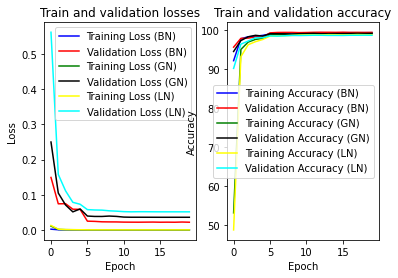

In [11]:
import torch
import model
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

norm_list = ['LN','GN','BN']
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

train_loss_lst_BN = []
test_loss_lst_BN = []

train_loss_lst_GN = []
test_loss_lst_GN = []

train_loss_lst_LN = []
test_loss_lst_LN = []

train_acur_lst_BN = []
test_acur_lst_BN = []

train_acur_lst_GN = []
test_acur_lst_GN = []

train_acur_lst_LN = []
test_acur_lst_LN = []

for norm in norm_list:
  my_model = model.Net(norm).to(device)
  optimizer = optim.SGD(my_model.parameters(), lr=0.4, momentum=0.9)
  schedular = StepLR(optimizer=optimizer,step_size=5,gamma=0.1)
  my_train_loader = mnist_train_loader()
  my_test_loader = mnist_test_loader()
  loss_train = 0
  loss_val = 0
  accur_train = 0
  accur_val = 0
  for epoch in range(20):
      #print(f'Epoch--> {epoch+1}')
      loss_train,accur_train = train(my_model, device,my_train_loader , optimizer, epoch)
      #print("Current learning rate:", optimizer.param_groups[0]['lr'])
      schedular.step()
      loss_val,accur_val = test(my_model, device,my_test_loader)
      
      if norm == 'BN':
        train_loss_lst_BN.append(loss_train)
        test_loss_lst_BN.append(loss_val)
        train_acur_lst_BN.append(accur_train)
        test_acur_lst_BN.append(accur_val)
      elif norm == 'LN':
        train_loss_lst_LN.append(loss_train)
        test_loss_lst_LN.append(loss_val)
        train_acur_lst_LN.append(accur_train)
        test_acur_lst_LN.append(accur_val)
      else :
        train_loss_lst_GN.append(loss_train)
        test_loss_lst_GN.append(loss_val)
        train_acur_lst_GN.append(accur_train)
        test_acur_lst_GN.append(accur_val)



# Plot the training and validation losses
plt.subplot(1,2,1)
plt.title("Train and validation losses")
plt.plot(train_loss_lst_BN,color= 'blue', label='Training Loss (BN)')
plt.plot(test_loss_lst_BN,color= 'red', label='Validation Loss (BN)')
plt.plot(train_loss_lst_GN,color= 'green', label='Training Loss (GN)')
plt.plot(test_loss_lst_GN,color= 'black', label='Validation Loss (GN)')
plt.plot(train_loss_lst_LN,color= 'yellow', label='Training Loss (LN)')
plt.plot(test_loss_lst_LN,color= 'cyan', label='Validation Loss (LN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.title("Train and validation accuracy")
plt.plot(train_acur_lst_BN,color= 'blue', label='Training Accuracy (BN)')
plt.plot(test_acur_lst_BN,color= 'red', label='Validation Accuracy (BN)')
plt.plot(train_acur_lst_GN,color= 'green', label='Training Accuracy (GN)')
plt.plot(test_acur_lst_GN,color= 'black', label='Validation Accuracy (GN)')
plt.plot(train_acur_lst_LN,color= 'yellow', label='Training Accuracy (LN)')
plt.plot(test_acur_lst_LN,color= 'cyan', label='Validation Accuracy (LN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



